## Introdução

### Sobre o dataset


Este conjunto de dados contém informações sobre feitiços para Dungeons and Dragons 5e, provenientes do Livro do Jogador básico e de todos os livros suplementares que foram lançados na data de publicação. A maioria das classes em D&D ganha a habilidade de lançar feitiços em algum momento, então se você jogar o jogo, acabará olhando a lista de feitiços para seu personagem aprender. 


In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('dnd-spells.csv')
df.head()

,name,classes,level,school,cast_time,range,duration,verbal,somatic,material,material_cost,description
0,Acid Splash,"Artificer, Sorcerer, Wizard",0,Conjuration,1 Action,60 Feet,Instantaneous,1,1,0,NaN,You hurl a bubble of acid. Choose one creature...
1,Blade Ward,"Bard, Sorcerer, Warlock, Wizard",0,Abjuration,1 Action,Self,1 round,1,1,0,NaN,You extend your hand and trace a sigil of ward...
2,Booming Blade,"Artificer, Sorcerer, Warlock, Wizard",0,Evocation,1 Action,Self (5-foot radius),1 round,0,1,1,a melee weapon worth at least 1 sp,You brandish the weapon used in the spell’s ca...
3,Chill Touch,"Sorcerer, Warlock, Wizard",0,Necromancy,1 Action,120 Feet,1 round,1,1,0,NaN,"You create a ghostly, skeletal hand in the spa..."
4,Control Flames,"Druid, Sorcerer, Wizard",0,Transmutation,1 Action,60 Feet,Instantaneous or 1 hour,0,1,0,NaN,You choose nonmagical flame that you can see w...


In [5]:
traducoes = {
    'Name': 'Nome',
    'Classes': 'Classes',
    'Level': 'Nível',
    'School': 'Escola',
    'Cast_time': 'Tempo_para_preparar',
    'Range': 'Alcance',
    'Duration': 'Duração',
    'Verbal': 'Verbal',
    'Somatic': 'Gestual',
    'Material': 'Material',
    'Material_cost': 'Custo_de_material',
    'Description': 'Descrição'
}
novas_colunas = []
for chave, valor in traducoes.items():
    novas_colunas.append(valor)

print(novas_colunas)

['Nome', 'Classes', 'Nível', 'Escola', 'Tempo_para_preparar', 'Alcance', 'Duração', 'Verbal', 'Gestual', 'Material', 'Custo_de_material', 'Descrição']


In [6]:
df.columns = novas_colunas
df

,Nome,Classes,Nível,Escola,Tempo_para_preparar,Alcance,Duração,Verbal,Gestual,Material,Custo_de_material,Descrição
0,Acid Splash,"Artificer, Sorcerer, Wizard",0,Conjuration,1 Action,60 Feet,Instantaneous,1,1,0,NaN,You hurl a bubble of acid. Choose one creature...
1,Blade Ward,"Bard, Sorcerer, Warlock, Wizard",0,Abjuration,1 Action,Self,1 round,1,1,0,NaN,You extend your hand and trace a sigil of ward...
2,Booming Blade,"Artificer, Sorcerer, Warlock, Wizard",0,Evocation,1 Action,Self (5-foot radius),1 round,0,1,1,a melee weapon worth at least 1 sp,You brandish the weapon used in the spell’s ca...
3,Chill Touch,"Sorcerer, Warlock, Wizard",0,Necromancy,1 Action,120 Feet,1 round,1,1,0,NaN,"You create a ghostly, skeletal hand in the spa..."
4,Control Flames,"Druid, Sorcerer, Wizard",0,Transmutation,1 Action,60 Feet,Instantaneous or 1 hour,0,1,0,NaN,You choose nonmagical flame that you can see w...
...,...,...,...,...,...,...,...,...,...,...,...,...
549,Time Stop,"Sorcerer, Wizard",9,Transmutation,1 Action,Self,Instantaneous,1,0,0,NaN,You briefly stop the flow of time for everyone...
550,True Polymorph,"Bard, Warlock, Wizard",9,Transmutation,1 Action,30 Feet,"Concentration, up to 1 hour",1,1,1,"a drop of mercury, a dollop of gum arabic, and...",Choose one creature or nonmagical object that ...
551,True Resurrection,"Cleric, Druid",9,Necromancy,1 Hour,Touch,Instantaneous,1,1,1,a sprinkle of holy water and diamonds worth at...,You touch a creature that has been dead for no...
552,Weird,"Warlock, Wizard",9,Illusion,1 Action,120 Feet,"Concentration, up to 1 minute",1,1,0,NaN,Drawing on the deepest fears of a group of cre...


In [7]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Nome                 554 non-null    object
 1   Classes              554 non-null    object
 2   Nível                554 non-null    int64 
 3   Escola               554 non-null    object
 4   Tempo_para_preparar  554 non-null    object
 5   Alcance              554 non-null    object
 6   Duração              554 non-null    object
 7   Verbal               554 non-null    int64 
 8   Gestual              554 non-null    int64 
 9   Material             554 non-null    int64 
 10  Custo_de_material    290 non-null    object
 11  Descrição            554 non-null    object
dtypes: int64(4), object(8)
memory usage: 52.1+ KB


In [9]:
df.isnull().sum()

Nome                     0
Classes                  0
Nível                    0
Escola                   0
Tempo_para_preparar      0
Alcance                  0
Duração                  0
Verbal                   0
Gestual                  0
Material                 0
Custo_de_material      264
Descrição                0
dtype: int64

### Divisão de feitiços por escola

Mostra quantos feitiços há para cada escola dentro do jogo e com isso qual a melhor escola a se pegar quando montar um personagem

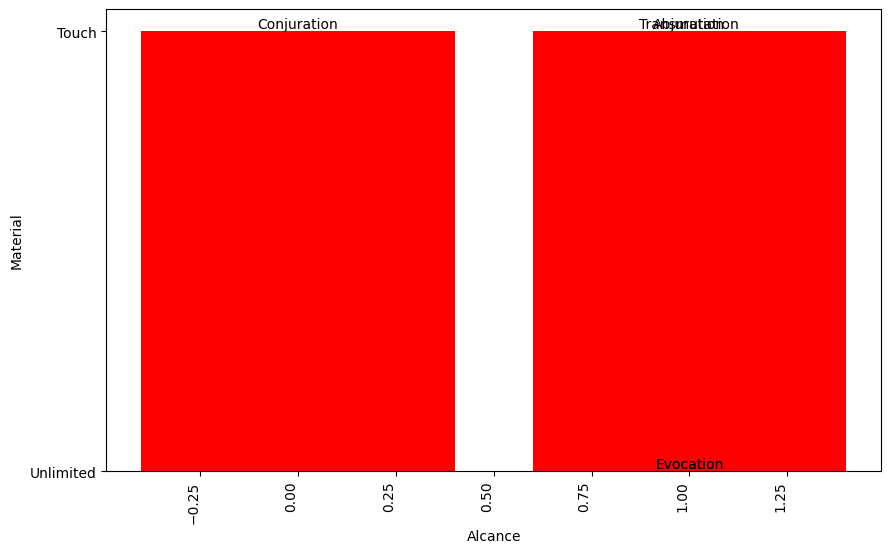

In [18]:
alcance = df.sort_values(by='Alcance', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(uso_material['Material'], alcance['Alcance'], color='red')
plt.xlabel('Alcance')
plt.ylabel('Material')
plt.xticks(rotation=90, ha='right')

for i, duracao in enumerate(uso_material['Material']):
    alcance_feitico = alcance.iloc[i]['Escola']
    plt.annotate(alcance_feitico, (duracao, alcance.iloc[i]['Alcance']), ha='center', va='bottom')

plt.show()

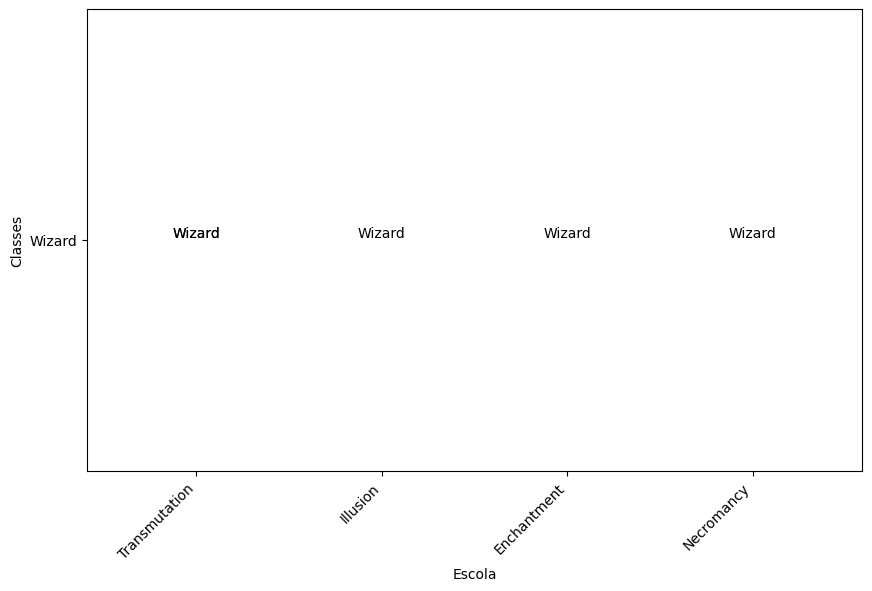

In [19]:
escola = df.sort_values(by='Classes', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(escola['Escola'], escola['Classes'], color='purple')
plt.xlabel('Escola')
plt.ylabel('Classes')
plt.xticks(rotation=45, ha='right')

for i, classes in enumerate(escola['Classes']):
    plt.annotate(classes, (escola['Escola'].iloc[i], classes), ha='center', va='bottom')

plt.show()


### Feitiços com maior duração

Aqui vemos os feitiços com maior duração, assim podemos escolher qual será mais bem utilizado em uma batalha

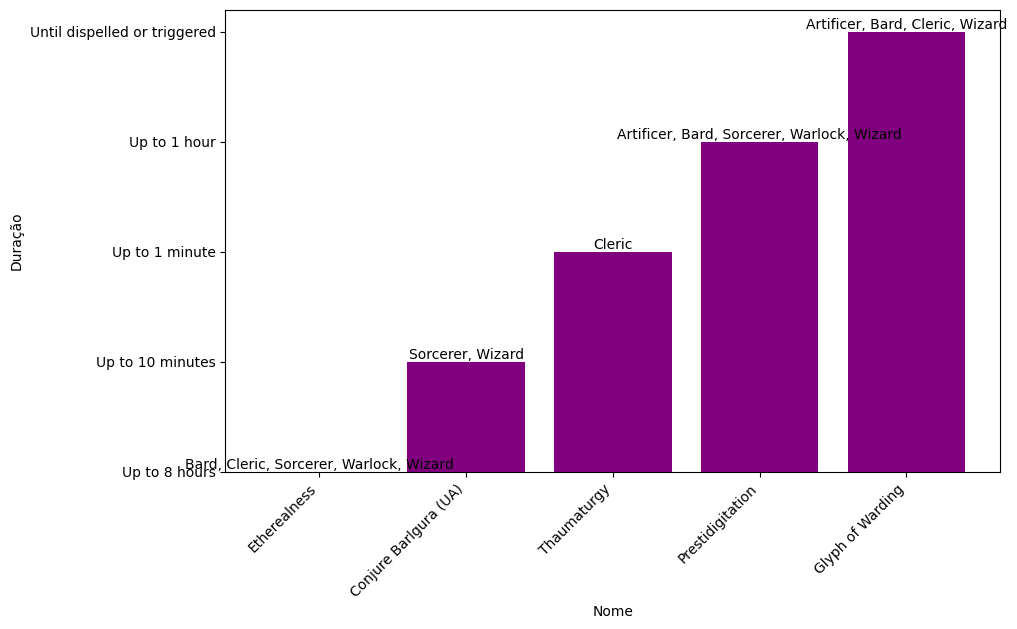

In [27]:
duracao_feitico = df.sort_values(by='Duração', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(nome_feitico['Nome'], duracao_feitico['Duração'], color='purple')
plt.xlabel('Nome')
plt.ylabel('Duração')
plt.xticks(rotation=45, ha='right')

for i, duracao in enumerate(nome_feitico['Nome']):
    escola = duracao_feitico.iloc[i]['Classes']
    plt.annotate(escola, (duracao, duracao_feitico.iloc[i]['Duração']), ha='center', va='bottom')

plt.show()

In [ ]:
custo_de_feitico = ['custo_de_material']
duracao_de_feitico = ['duração']

plt.xlabel('Duração do Feitiço')
plt.ylabel('Custo do Feitiço')
plt.title('Custo de Feitiço por Duração de Feitiço')

plt.show()